# Regular expression doesn't work for html
check https://stackoverflow.com/questions/590747/using-regular-expressions-to-parse-html-why-not

# Trial with beautiful soup

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings("ignore")

url = 'file:///Users/zhangyumeng/Desktop/GSFM/Keyword%20search%20results_me/748268_8-K_2020-10-05_0001554795-20-000254.html'
html = urlopen(url).read()
soup = BeautifulSoup(html,"html5lib")

In [2]:
searched_word ='storage'
results = soup.body.find_all(string=re.compile('.*{0}.*'.format(searched_word)), recursive=True)
print('Found the word "{0}" {1} times\n'.format(searched_word, len(results)))
print(results)

Found the word "storage" 1 times

['-based distributed storage analytics and SaaS solutions for adoption in the drone industry. Red Cat supports education training and sales of drone products through its Rotor Riot platform and is developing the means to accurately track report and review f .....']


# Function to identify a list of defined words

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os
import pandas as pd
import re

def process_html(path,searched_words):
    html_files = os.listdir(path)
    dict_for_words = {}
    for word in searched_words:
        lst = []
        for file in html_files:
            f = os.path.join(path, file)
            url = 'file://' + f
            html = urlopen(url).read()
            soup = BeautifulSoup(html,"html5lib")
            results = soup.body.find_all(string=re.compile('.*{0}.*'.format(word)))
            if len(results) > 0 and 'Blockchain' not in soup.br.next_sibling:
                lst.append(soup.br.next_sibling.replace('Company Name: ','')) 
        dict_for_words[word] = pd.Series(list(set(lst)))
        df = pd.DataFrame.from_dict(dict_for_words)
    return df

# Function test

In [4]:
searched_words = ['storage','accounting','supply', 'payments','SaaS','cryptocurrency','NFT','creation','security','identity']
path = '/Users/zhangyumeng/Desktop/GSFM/Keyword search results_full'

In [5]:
result = process_html(path,searched_words)

In [6]:
result

,storage,accounting,supply,payments,SaaS,cryptocurrency,NFT,creation,security,identity
0,AppCoin Innovations Inc,Snap Interactive Inc,Technovative Group Inc,CLIC TECHNOLOGY INC,IMAGEWARE SYSTEMS INC,CLIC TECHNOLOGY INC,Cosmos Group Holdings Inc,W Technologies Inc,DALRADA FINANCIAL CORP,National Bank Holdings Corp
1,Red Cat Holdings Inc,ORANCO INC,ROCKETFUEL BLOCKCHAIN INC,AppCoin Innovations Inc,Red Cat Holdings Inc,DigitalTown Inc,GOOD GAMING INC,Cosmos Group Holdings Inc,TrueNorth Quantum Inc,Roth CH Acquisition II Co
2,TimefireVR Inc,Cabinet Grow Inc,TURNER VALLEY OIL GAS INC,Net Element Inc,NaN,HPIL HOLDING,Troika Media Group Inc,WEWARDS INC,Amesite Inc,TrueNorth Quantum Inc
3,ADVANCED CREDIT TECHNOLOGIES INC,Roth CH Acquisition II Co,Red Cat Holdings Inc,IWEB Inc,NaN,Nodechain Inc,CurrencyWorks Inc,NEW YORK COMMUNITY BANCORP INC,OBITX Inc,AppCoin Innovations Inc
4,Celebiddy Inc,ROCKETFUEL BLOCKCHAIN INC,Troika Media Group Inc,National Bank Holdings Corp,NaN,TrueNorth Quantum Inc,Biopower Operations Corp,NaN,B4MC GOLD MINES INC,NaN
5,SOLLENSYS CORP,AppCoin Innovations Inc,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,B4MC GOLD MINES INC,NaN,Creek Road Miners Inc,Roth CH Acquisition II Co,NaN,OVERSTOCK COM INC,NaN
6,W Technologies Inc,IZEA Inc,ADVANCED CREDIT TECHNOLOGIES INC,NaN,NaN,Force Protection Video Equipment Corp,SANTO MINING CORP,NaN,Code Chain New Continent Ltd,NaN
7,Moms Online Inc,Summit Networks Inc,SOLLENSYS CORP,NaN,NaN,DIAMONDHEAD CASINO CORP,NaN,NaN,ION Acquisition Corp 3 Ltd,NaN
8,NaN,PeerStream Inc,OLB GROUP INC,NaN,NaN,OBITX Inc,NaN,NaN,DropCar Inc,NaN
9,NaN,Future FinTech Group Inc,Code Chain New Continent Ltd,NaN,NaN,Tongji Healthcare Group Inc,NaN,NaN,UNION BRIDGE HOLDINGS LTD,NaN


Text(0.5, 1.0, 'Keyword Count')

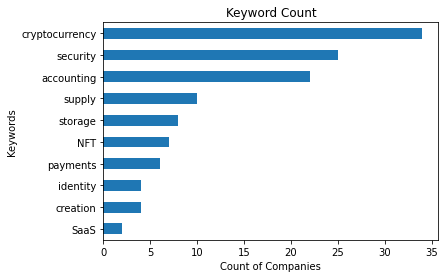

In [7]:
bar = result.count()
ax = bar.sort_values(ascending=True).plot.barh()
ax.set_ylabel('Keywords')
ax.set_xlabel('Count of Companies')
ax.set_title('Keyword Count')